In [ ]:
!pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

In [ ]:
# 삼성코드 : 005930
df = fdr.DataReader('005930','2018-12-01','2022-02-17')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 792 entries, 2018-12-03 to 2022-02-17
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    792 non-null    int64  
 1   High    792 non-null    int64  
 2   Low     792 non-null    int64  
 3   Close   792 non-null    int64  
 4   Volume  792 non-null    int64  
 5   Change  792 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 43.3 KB


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-12-03,42750,43400,42400,43250,12110702,0.033453
2018-12-04,42650,42900,41900,42150,14347746,-0.025434
2018-12-05,40900,41750,40850,41450,12631983,-0.016607
2018-12-06,40600,41100,40450,40500,14251826,-0.022919
2018-12-07,40900,41400,40850,40950,11433083,0.011111


In [ ]:
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-02-11,75000,75500,74600,74900,12205407,-0.006631
2022-02-14,74400,74500,73100,73700,13993255,-0.016021
2022-02-15,74100,74200,73100,73700,9320365,0.000000
2022-02-16,74600,74900,74200,74800,10767386,0.014925
2022-02-17,75000,75600,74500,75000,13605382,0.002674


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime # 오늘날짜 가져올때 사용
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors # 색상표

# 한글폰트 설정, 그래프 마이너스 표시 설정
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# 볼린저 밴드 그리기

In [ ]:
df['ma20'] = df['Close'].rolling(window=20).mean() # 20일 이동평균
df['stddev'] = df['Close'].rolling(window=20).std() # 20일 이동표준편차
df['upper'] = df['ma20'] + 2*df['stddev'] # 상단밴드
df['lower'] = df['ma20'] - 2*df['stddev'] # 하단밴드
df = df[19:] # 20일 이동평균을 구했기 때문에 20번째 행부터 값이 들어가 있음
df

,Open,High,Low,Close,Volume,Change,ma20,stddev,upper,lower
Date,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,39772.5,1370.312584,42513.125169,37031.874831
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,39490.0,1185.615541,41861.231082,37118.768918
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,39255.0,1092.787358,41440.574717,37069.425283
2019-01-07,38000,38900,37800,38750,12748997,0.034713,39120.0,966.872331,41053.744663,37186.255337
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,39000.0,934.992260,40869.984520,37130.015480
...,...,...,...,...,...,...,...,...,...,...
2022-02-11,75000,75500,74600,74900,12205407,-0.006631,75140.0,1972.815247,79085.630495,71194.369505
2022-02-14,74400,74500,73100,73700,13993255,-0.016021,74880.0,1784.907487,78449.814974,71310.185026
2022-02-15,74100,74200,73100,73700,9320365,0.000000,74670.0,1653.099163,77976.198326,71363.801674


In [ ]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
ma20      0
stddev    0
upper     0
lower     0
dtype: int64

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


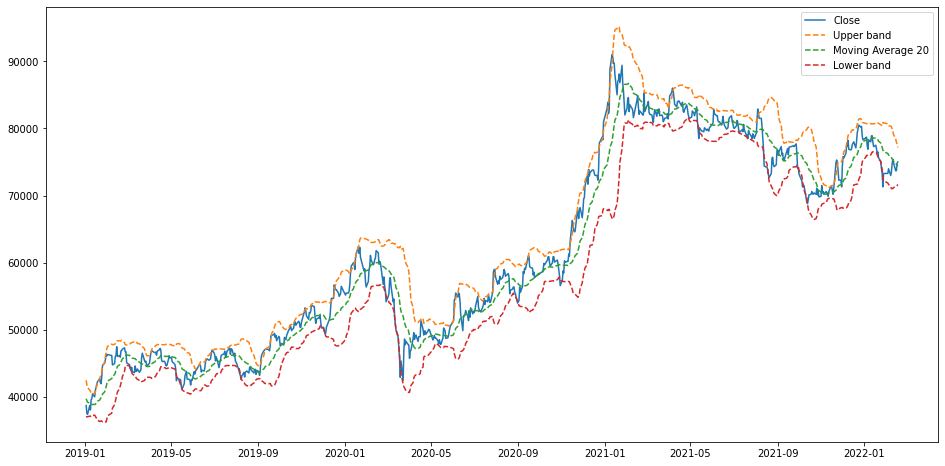

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['upper'], linestyle='dashed', label='Upper band')
plt.plot(df.index, df['ma20'], linestyle='dashed', label='Moving Average 20')
plt.plot(df.index, df['lower'], linestyle='dashed', label='Lower band')
plt.legend(loc='best');

In [ ]:
trading_book = df.copy().assign(action='', state='').reset_index()
trading_book.head()

,Date,Open,High,Low,Close,Volume,Change,ma20,stddev,upper,lower,action,state
0,2019-01-02,39400,39400,38550,38750,7847664,0.001292,39772.5,1370.312584,42513.125169,37031.874831,,
1,2019-01-03,38300,38550,37450,37600,12471493,-0.029677,39490.0,1185.615541,41861.231082,37118.768918,,
2,2019-01-04,37450,37600,36850,37450,14108958,-0.003989,39255.0,1092.787358,41440.574717,37069.425283,,
3,2019-01-07,38000,38900,37800,38750,12748997,0.034713,39120.0,966.872331,41053.744663,37186.255337,,
4,2019-01-08,38000,39200,37950,38100,12756554,-0.016774,39000.0,934.992260,40869.984520,37130.015480,,


In [ ]:
trading_book.tail()

,Date,Open,High,Low,Close,Volume,Change,ma20,stddev,upper,lower,action,state
768,2022-02-11,75000,75500,74600,74900,12205407,-0.006631,75140.0,1972.815247,79085.630495,71194.369505,,
769,2022-02-14,74400,74500,73100,73700,13993255,-0.016021,74880.0,1784.907487,78449.814974,71310.185026,,
770,2022-02-15,74100,74200,73100,73700,9320365,0.000000,74670.0,1653.099163,77976.198326,71363.801674,,
771,2022-02-16,74600,74900,74200,74800,10767386,0.014925,74545.0,1533.992040,77612.984080,71477.015920,,
772,2022-02-17,75000,75600,74500,75000,13605382,0.002674,74420.0,1374.045123,77168.090246,71671.909754,,


In [ ]:
for i in range(len(trading_book)):
    # 초기값 설정
    if i==0:
        # 종가가 하단밴드 이하이면 매수
        if trading_book.loc[i, 'Close'] <= trading_book.loc[i, 'lower']:
            trading_book.loc[i, 'action'] = 'buy'
            trading_book.loc[i, 'state'] = 'holding'
        # 이외에는 아무것도 안하기
        else:
            trading_book.loc[i, 'action'] = ''
            trading_book.loc[i, 'state'] = ''
    else:
        # 종가가 하단밴드 이하인데
        if trading_book.loc[i, 'Close'] <= trading_book.loc[i, 'lower']:
            # 이전상태가 보유중이 아니면 매수
            if trading_book.loc[i-1, 'state'] not in ['holding']:
                trading_book.loc[i, 'action'] = 'buy'
                trading_book.loc[i, 'state'] = 'holding'
            # 이전상태가 보유중이면 그대로 보유
            elif trading_book.loc[i-1, 'state'] in ['holding']:
                trading_book.loc[i, 'action'] = 'hold'
                trading_book.loc[i, 'state'] = 'holding'

        # 종가가 상단밴드 이상인데
        elif trading_book.loc[i, 'Close'] >= trading_book.loc[i, 'upper']:
            # 이전상태가 보유중이 아니면 그대로 있기
            if trading_book.loc[i-1, 'state'] not in ['holding']:
                trading_book.loc[i, 'action'] = 'hold'
            # 이전상태가 보유중이면 매도
            elif trading_book.loc[i-1, 'state'] in ['holding']:
                trading_book.loc[i, 'action'] = 'sell'
                trading_book.loc[i, 'state'] = ''

        # 그 외에는 아무 행동도 하지 않고 상태는 이전상태 그대로 유지
        else:
            trading_book.loc[i, 'action'] = ''
            trading_book.loc[i, 'state'] = trading_book.loc[i-1]['state']

In [ ]:
report = trading_book.loc[trading_book['action'].isin(['buy', 'sell']), ['Date', 'Close', 'upper', 'lower', 'action', 'state']].reset_index(drop=True)
report

,Date,Close,upper,lower,action,state
0,2019-03-05,44250,47950.405506,44299.594494,buy,holding
1,2019-06-10,44800,44748.185454,41051.814546,sell,
2,2019-08-05,43950,47918.946780,44356.053220,buy,holding
3,2019-09-05,45700,45120.997463,42549.002537,sell,
4,2019-11-29,50300,54054.266555,50495.733445,buy,holding
5,2019-12-13,54700,54372.046695,48752.953305,sell,
6,2020-02-28,54200,63145.736257,55024.263743,buy,holding
7,2020-06-01,51200,51146.486137,47263.513863,sell,
8,2020-08-31,54000,59606.664886,54353.335114,buy,holding
9,2020-09-14,60400,60327.443121,53092.556879,sell,


In [ ]:
report = report.assign(buy_price=report['Close'].shift(1))
report

,Date,Close,upper,lower,action,state,buy_price
0,2019-03-05,44250,47950.405506,44299.594494,buy,holding,NaN
1,2019-06-10,44800,44748.185454,41051.814546,sell,,44250.0
2,2019-08-05,43950,47918.946780,44356.053220,buy,holding,44800.0
3,2019-09-05,45700,45120.997463,42549.002537,sell,,43950.0
4,2019-11-29,50300,54054.266555,50495.733445,buy,holding,45700.0
5,2019-12-13,54700,54372.046695,48752.953305,sell,,50300.0
6,2020-02-28,54200,63145.736257,55024.263743,buy,holding,54700.0
7,2020-06-01,51200,51146.486137,47263.513863,sell,,54200.0
8,2020-08-31,54000,59606.664886,54353.335114,buy,holding,51200.0
9,2020-09-14,60400,60327.443121,53092.556879,sell,,54000.0


In [ ]:
report.loc[~report['action'].isin(['sell']), 'buy_price'] = np.nan
report

,Date,Close,upper,lower,action,state,buy_price
0,2019-03-05,44250,47950.405506,44299.594494,buy,holding,NaN
1,2019-06-10,44800,44748.185454,41051.814546,sell,,44250.0
2,2019-08-05,43950,47918.946780,44356.053220,buy,holding,NaN
3,2019-09-05,45700,45120.997463,42549.002537,sell,,43950.0
4,2019-11-29,50300,54054.266555,50495.733445,buy,holding,NaN
5,2019-12-13,54700,54372.046695,48752.953305,sell,,50300.0
6,2020-02-28,54200,63145.736257,55024.263743,buy,holding,NaN
7,2020-06-01,51200,51146.486137,47263.513863,sell,,54200.0
8,2020-08-31,54000,59606.664886,54353.335114,buy,holding,NaN
9,2020-09-14,60400,60327.443121,53092.556879,sell,,54000.0


In [ ]:
report.loc[report['action'].isin(['sell']), 'yield(%)'] = round((report['Close']/report['buy_price']-1)*100, 2)
report

,Date,Close,upper,lower,action,state,buy_price,yield(%)
0,2019-03-05,44250,47950.405506,44299.594494,buy,holding,NaN,NaN
1,2019-06-10,44800,44748.185454,41051.814546,sell,,44250.0,1.24
2,2019-08-05,43950,47918.946780,44356.053220,buy,holding,NaN,NaN
3,2019-09-05,45700,45120.997463,42549.002537,sell,,43950.0,3.98
4,2019-11-29,50300,54054.266555,50495.733445,buy,holding,NaN,NaN
5,2019-12-13,54700,54372.046695,48752.953305,sell,,50300.0,8.75
6,2020-02-28,54200,63145.736257,55024.263743,buy,holding,NaN,NaN
7,2020-06-01,51200,51146.486137,47263.513863,sell,,54200.0,-5.54
8,2020-08-31,54000,59606.664886,54353.335114,buy,holding,NaN,NaN
9,2020-09-14,60400,60327.443121,53092.556879,sell,,54000.0,11.85


In [ ]:
!pip install mplfinance
!pip install mpl_finance

     |████████████████████████████████| 70 kB 3.0 MB/s 


In [ ]:
from mpl_finance import candlestick2_ohlc

No handles with labels found to put in legend.


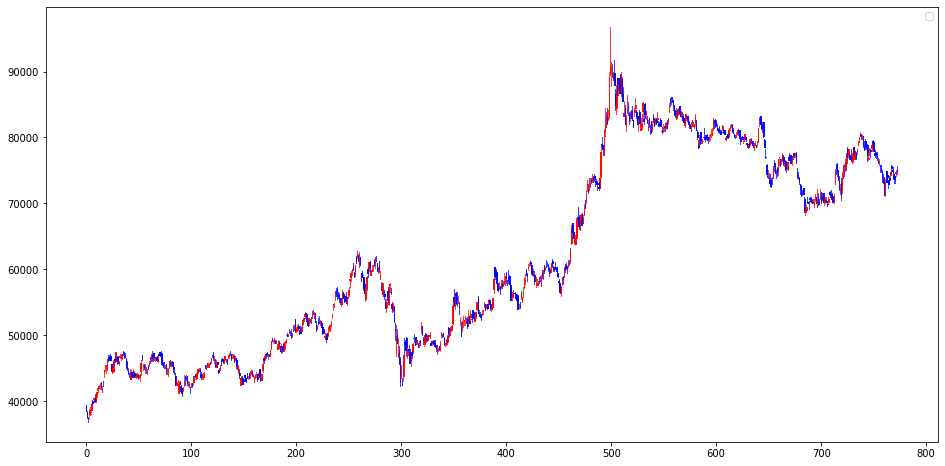

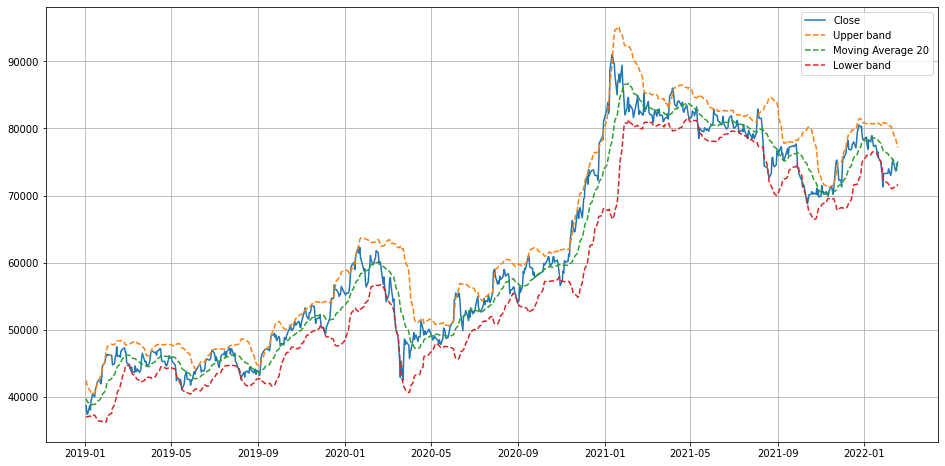

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['upper'], linestyle='dashed', label='Upper band')
plt.plot(df.index, df['ma20'], linestyle='dashed', label='Moving Average 20')
plt.plot(df.index, df['lower'], linestyle='dashed', label='Lower band')
plt.legend(loc='best');


candlestick2_ohlc(ax, df['Open'], df['High'], 
                  df['Low'], df['Close'],
                  width=0.5, colorup='r', colordown='b')
ax.legend()
plt.grid()
plt.show()



## Backtesting

In [ ]:
df

,Open,High,Low,Close,Volume,Change,ma20,stddev,upper,lower
Date,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,39772.5,1370.312584,42513.125169,37031.874831
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,39490.0,1185.615541,41861.231082,37118.768918
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,39255.0,1092.787358,41440.574717,37069.425283
2019-01-07,38000,38900,37800,38750,12748997,0.034713,39120.0,966.872331,41053.744663,37186.255337
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,39000.0,934.992260,40869.984520,37130.015480
...,...,...,...,...,...,...,...,...,...,...
2022-02-11,75000,75500,74600,74900,12205407,-0.006631,75140.0,1972.815247,79085.630495,71194.369505
2022-02-14,74400,74500,73100,73700,13993255,-0.016021,74880.0,1784.907487,78449.814974,71310.185026
2022-02-15,74100,74200,73100,73700,9320365,0.000000,74670.0,1653.099163,77976.198326,71363.801674


In [ ]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
ma20      0
stddev    0
upper     0
lower     0
dtype: int64

In [ ]:
signal = []
for i in range(len(df)):
    if df['Close'].values[i] > df['upper'].values[i]:
      signal.append(-1)
    elif df['Close'].values[i] < df['lower'].values[i]:
      signal.append(1)
    else :
      signal.append(0)

In [ ]:
signal

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
df['signal'] = signal

In [ ]:
df

,Open,High,Low,Close,Volume,Change,ma20,stddev,upper,lower,signal
Date,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,39772.5,1370.312584,42513.125169,37031.874831,0
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,39490.0,1185.615541,41861.231082,37118.768918,0
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,39255.0,1092.787358,41440.574717,37069.425283,0
2019-01-07,38000,38900,37800,38750,12748997,0.034713,39120.0,966.872331,41053.744663,37186.255337,0
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,39000.0,934.992260,40869.984520,37130.015480,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,75000,75500,74600,74900,12205407,-0.006631,75140.0,1972.815247,79085.630495,71194.369505,0
2022-02-14,74400,74500,73100,73700,13993255,-0.016021,74880.0,1784.907487,78449.814974,71310.185026,0
2022-02-15,74100,74200,73100,73700,9320365,0.000000,74670.0,1653.099163,77976.198326,71363.801674,0


In [ ]:
!pip install finterstellar

     |████████████████████████████████| 109 kB 4.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(df,factor='signal', buy=0, sell=0)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2022-02-11     buy
2022-02-14     buy
2022-02-15     buy
2022-02-16     buy
2022-02-17     buy
Name: trade, Length: 773, dtype: object

In [ ]:
fs.position(df)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2022-02-11    ll
2022-02-14    ll
2022-02-15    ll
2022-02-16    ll
2022-02-17    ll
Name: position, Length: 773, dtype: object

In [ ]:
plt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

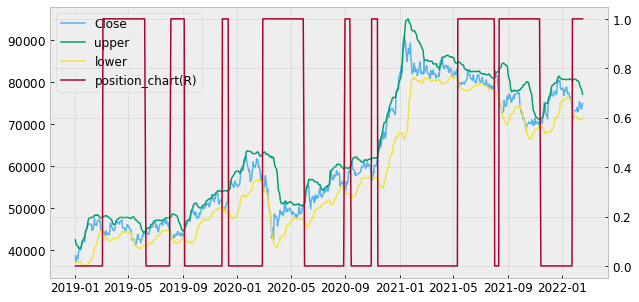

In [ ]:
fs.draw_chart(df, left=['Close','upper','lower'], right='position_chart')

In [ ]:
fs.evaluate(df, cost=0.0001)

,Open,High,Low,Close,Volume,Change,ma20,stddev,upper,lower,signal,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,39772.5,1370.312584,42513.125169,37031.874831,0,zero,,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,39490.0,1185.615541,41861.231082,37118.768918,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9721
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,39255.0,1092.787358,41440.574717,37069.425283,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9505
2019-01-07,38000,38900,37800,38750,12748997,0.034713,39120.0,966.872331,41053.744663,37186.255337,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9645
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,39000.0,934.992260,40869.984520,37130.015480,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,75000,75500,74600,74900,12205407,-0.006631,75140.0,1972.815247,79085.630495,71194.369505,0,buy,ll,1,1.0,0.992063,1.043742,4.37,0.9104,0.8306
2022-02-14,74400,74500,73100,73700,13993255,-0.016021,74880.0,1784.907487,78449.814974,71310.185026,0,buy,ll,1,1.0,0.992000,1.035392,3.54,0.9031,0.8239
2022-02-15,74100,74200,73100,73700,9320365,0.000000,74670.0,1653.099163,77976.198326,71363.801674,0,buy,ll,1,1.0,0.995968,1.031217,3.12,0.8995,0.8206


In [ ]:
fs.performance(df, rf_rate=0.02)

CAGR: 1.38%
Accumulated return: 4.37%
Average return: 0.64%
Benchmark return : 90.36%
Number of trades: 9
Number of win: 4
Hit ratio: 44.44%
Investment period: 3.1yrs
Sharpe ratio: -0.03
MDD: -26.04%
Benchmark MDD: -31.29%


In [ ]:
df.loc[(df.index>'2019-03-03')&(df.index<'2019-05-01'),:]

,Open,High,Low,Close,Volume,Change,ma20,stddev,upper,lower,signal,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd,exs_rtn_daily
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-04,46000,46100,44800,44850,12926539,-0.005543,46232.5,799.880748,47832.261495,44632.738505,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9705,-0.000055
2019-03-05,44600,45100,44150,44250,10612405,-0.013378,46125.0,912.702753,47950.405506,44299.594494,1,buy,zl,1,1.0,1.000000,1.000000,0.00,1.0000,0.9409,-0.000055
2019-03-06,44000,44300,43700,44000,10202544,-0.005650,46017.5,1028.831095,48075.162189,43959.837811,0,buy,ll,1,1.0,0.986547,0.986547,-1.35,0.9865,0.9283,-0.013508
2019-03-07,43400,44950,43400,44450,11049749,0.010227,45922.5,1082.817354,48088.134707,43756.865293,0,buy,ll,1,1.0,0.986364,0.973094,-2.69,0.9731,0.9156,-0.013691
2019-03-08,44450,44800,43800,43800,7729069,-0.014623,45802.5,1179.147216,48160.794433,43444.205567,0,buy,ll,1,1.0,1.024194,0.996637,-0.34,0.9966,0.9378,0.024139
2019-03-11,44400,44450,43650,43650,10717408,-0.003425,45745.0,1256.132326,48257.264653,43232.735347,0,buy,ll,1,1.0,0.998875,0.995516,-0.45,0.9955,0.9367,-0.001180
2019-03-12,44300,44950,44150,44650,11431977,0.022910,45727.5,1269.425378,48266.350755,43188.649245,0,buy,ll,1,1.0,0.997748,0.993274,-0.67,0.9933,0.9346,-0.002307
2019-03-13,44250,44450,43700,43850,8108343,-0.017917,45617.5,1333.700333,48284.900667,42950.099333,0,buy,ll,1,1.0,0.998871,0.992152,-0.78,0.9922,0.9335,-0.001183
2019-03-14,43700,44300,43550,43850,18039161,0.000000,45500.0,1382.313088,48264.626176,42735.373824,0,buy,ll,1,1.0,0.987571,0.979821,-2.02,0.9798,0.9219,-0.012484


bollinger(데이터, 기간, 밴드 폭)

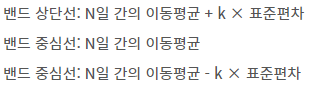

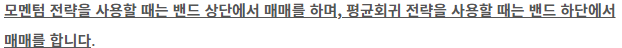

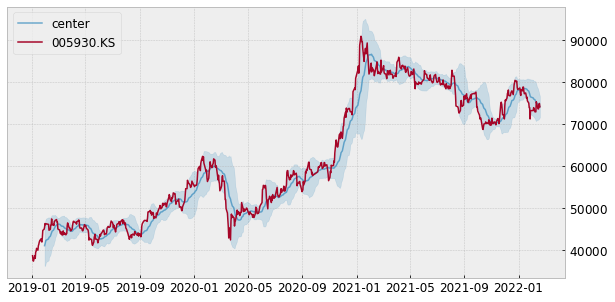

In [ ]:
df = fs.get_price('005930.KS', start_date='2018-12-17', end_date='2022-02-17')
fs.bollinger(df, w=20, k=2)
fs.draw_band_chart(df)

모멘텀 전략

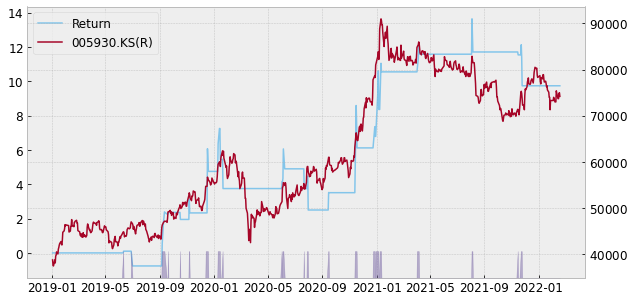

In [ ]:
fs.band_to_signal(df, buy='A', sell='B')
fs.position(df)
fs.evaluate(df, cost=.0001)
fs.draw_trade_results(df)


In [ ]:
fs.performance(df, rf_rate=.02)

CAGR: 3.09%
Accumulated return: 9.74%
Average return: 0.43%
Benchmark return : 63.08%
Number of trades: 22
Number of win: 15
Hit ratio: 68.18%
Investment period: 3.1yrs
Sharpe ratio: 0.16
MDD: -4.43%
Benchmark MDD: -31.89%


평균회귀 전략

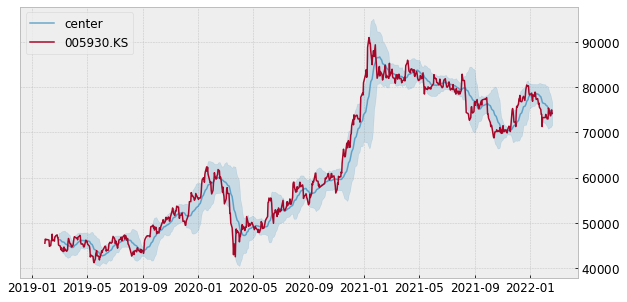

In [ ]:
f = fs.get_price('005930.KS', start_date='2018-12-17', end_date='2022-02-17')
fs.bollinger(df, w=20, k=2)
fs.draw_band_chart(df)

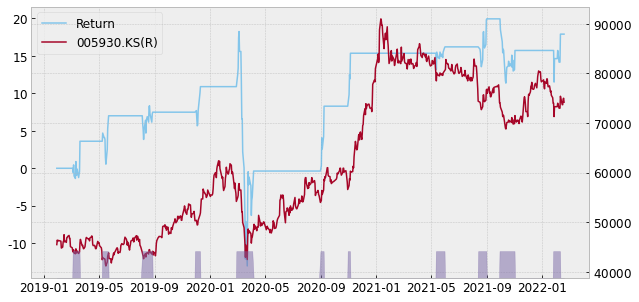

In [ ]:
fs.band_to_signal(df, buy='D', sell='B')
fs.position(df)
fs.evaluate(df, cost=.0001)
fs.draw_trade_results(df)


In [ ]:
fs.performance(df, rf_rate=.02)

CAGR: 5.69%
Accumulated return: 17.91%
Average return: 1.63%
Benchmark return : 64.52%
Number of trades: 11
Number of win: 9
Hit ratio: 81.82%
Investment period: 3.0yrs
Sharpe ratio: 0.21
MDD: -26.47%
Benchmark MDD: -31.89%


둘 다 합쳐서

CAGR: 8.79%
Accumulated return: 29.39%
Average return: 0.83%
Benchmark return : 63.08%
Number of trades: 33
Number of win: 24
Hit ratio: 72.73%
Investment period: 3.1yrs
Sharpe ratio: 0.37
MDD: -26.47%
Benchmark MDD: -31.89%


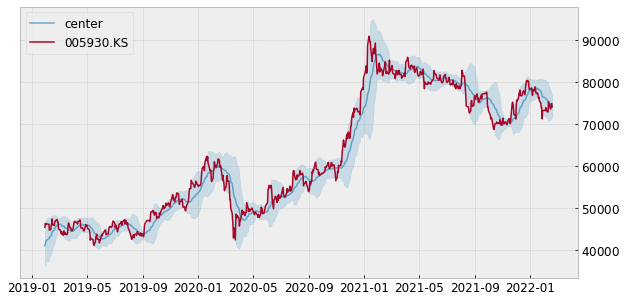

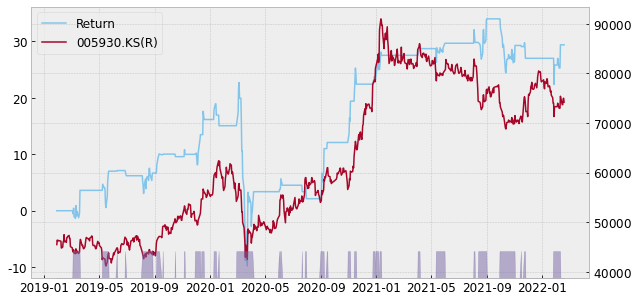

In [ ]:
df = fs.get_price('005930.KS', start_date='2018-12-17', end_date='2022-02-17')
df = fs.bollinger(df, w=20, k=2)
df['s1'] = fs.band_to_signal(df, buy='A', sell='B')
df['s2'] = fs.band_to_signal(df, buy='D', sell='B')
fs.combine_signal_or(df, 's1', 's2')
fs.position(df)
fs.evaluate(df, cost=.0001)
fs.performance(df, rf_rate=.02)
fs.draw_band_chart(df)
fs.draw_trade_results(df)


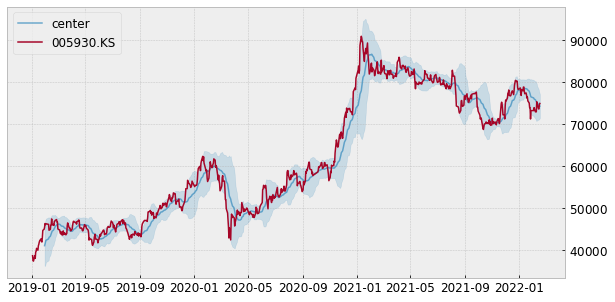

In [ ]:
df = fs.get_price('005930.KS', start_date='2019-01-01', end_date='2022-02-17')
fs.bollinger(df, w=20, k=2)
fs.draw_band_chart(df)

모멘텀 전략

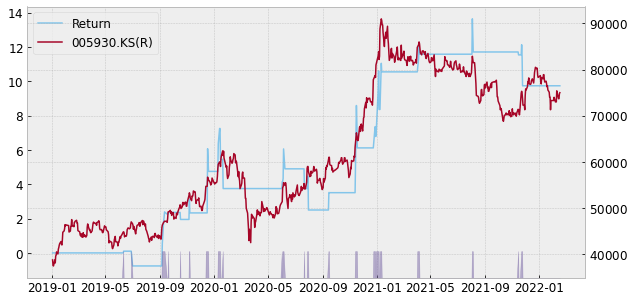

In [ ]:
fs.band_to_signal(df, buy='A', sell='B')
fs.position(df)
fs.evaluate(df, cost=.0001)
fs.draw_trade_results(df)


In [ ]:
fs.performance(df, rf_rate=.02)

CAGR: 3.09%
Accumulated return: 9.74%
Average return: 0.43%
Benchmark return : 64.84%
Number of trades: 22
Number of win: 15
Hit ratio: 68.18%
Investment period: 3.1yrs
Sharpe ratio: 0.16
MDD: -4.43%
Benchmark MDD: -31.89%


평균회귀 전략

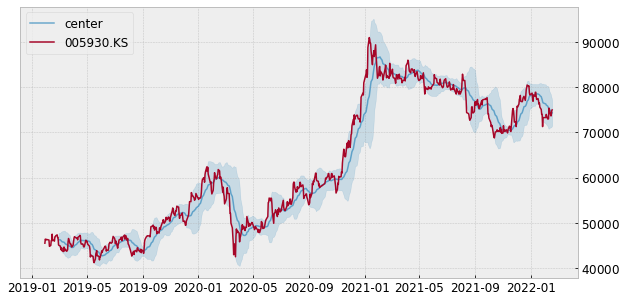

In [ ]:
f = fs.get_price('005930.KS', start_date='2019-01-01', end_date='2022-02-17')
fs.bollinger(df, w=20, k=2)
fs.draw_band_chart(df)

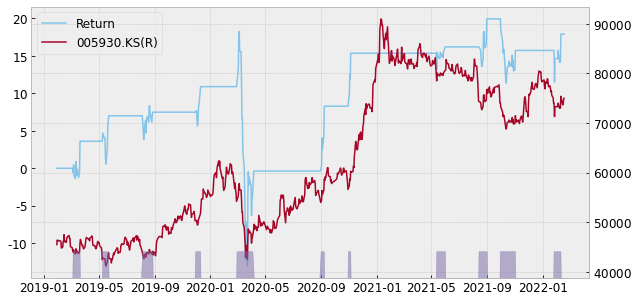

In [ ]:
fs.band_to_signal(df, buy='D', sell='B')
fs.position(df)
fs.evaluate(df, cost=.0001)
fs.draw_trade_results(df)


In [ ]:
fs.performance(df, rf_rate=.02)

CAGR: 5.70%
Accumulated return: 17.91%
Average return: 1.63%
Benchmark return : 66.30%
Number of trades: 11
Number of win: 9
Hit ratio: 81.82%
Investment period: 3.0yrs
Sharpe ratio: 0.21
MDD: -26.47%
Benchmark MDD: -31.89%


둘 다 합쳐서

CAGR: 8.80%
Accumulated return: 29.39%
Average return: 0.83%
Benchmark return : 64.84%
Number of trades: 33
Number of win: 24
Hit ratio: 72.73%
Investment period: 3.1yrs
Sharpe ratio: 0.37
MDD: -26.47%
Benchmark MDD: -31.89%


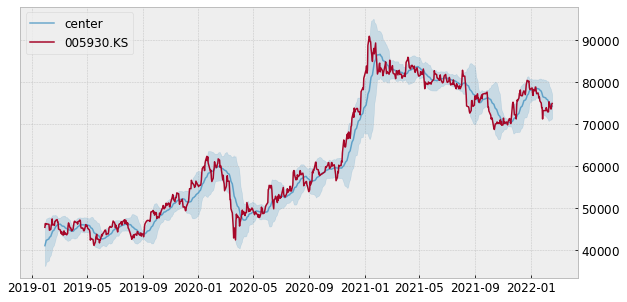

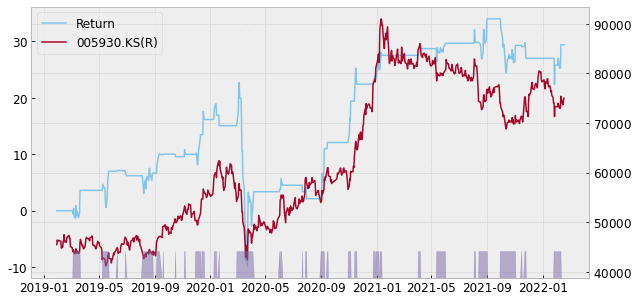

In [ ]:
df = fs.get_price('005930.KS', start_date='2019-01-01', end_date='2022-02-17')
df = fs.bollinger(df, w=20, k=2)
df['s1'] = fs.band_to_signal(df, buy='A', sell='B')
df['s2'] = fs.band_to_signal(df, buy='D', sell='B')
fs.combine_signal_or(df, 's1', 's2')
fs.position(df)
fs.evaluate(df, cost=.0001)
fs.performance(df, rf_rate=.02)
fs.draw_band_chart(df)
fs.draw_trade_results(df)


# %b 와 밴드폭(BandWidth)

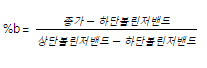
```
1. %b

주가가 볼린저 밴드 어디에 있는지 나타내는 지표
%b 값은 종가가 상단밴드를 태그하면 1이되고, 중간밴드를 태그하면 0.5, 하단밴드를 태그하면 0이 됨
만약 종가가 상단밴드 위에 있으면 %b 값은 1보다 커지고, 종가가 하단밴드 아래에 있으면 0보다 작아짐


2. 밴드폭(BandWidth)

상단밴드와 하단밴드 사이의 폭
변동계수와 같은 개념으로 볼 수 있음
볼린저는 밴드폭을 통해 추세의 시작과 끝을 포착해보고자 함
(1) 추세의 시작: 변동성이 극히 낮은 수준(ex. 밴드폭의 6개월 저점)까지 떨어져서 곧이어 변동성 증가가 발생할 것으로 예상되는 지점을 추세의 시작으로 봄
(2) 추세의 끝: 주가가 강한 상승을 보여 밴드폭이 급격하게 증가하다가 밴드폭의 변동이 없거나 줄어드는 지점을 추세의 끝으로 봄
```
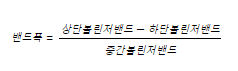

In [ ]:
df = fdr.DataReader('005930','2018-11-20','2022-02-17')

In [ ]:
df = df.assign(이동평균=df['Close'].rolling(window=20).mean(),
               표준편차=df['Close'].rolling(window=20).std())
df = df.assign(상단밴드=df['이동평균'] + df['표준편차']*2,
               하단밴드=df['이동평균'] - df['표준편차']*2)
df = df.assign(PB=(df['Close']-df['하단밴드']) / (df['상단밴드']-df['하단밴드']),
               밴드폭=(df['상단밴드']-df['하단밴드'])/df['이동평균'])
df = df[19:]

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Change,이동평균,표준편차,상단밴드,하단밴드,PB,밴드폭
Date,,,,,,,,,,,,
2018-12-17,38650,39600,38650,39150,11532968,0.005135,41542.5,1382.719955,44307.939910,38777.060090,0.067429,0.133138
2018-12-18,38300,39200,38300,38900,11042101,-0.006386,41347.5,1468.392874,44284.285747,38410.714253,0.083303,0.142054
2018-12-19,38900,39350,38850,39100,9942037,0.005141,41197.5,1539.008139,44275.516278,38119.483722,0.159277,0.149427
2018-12-20,38600,39100,38500,38650,11937617,-0.011509,41007.5,1609.206653,44225.913306,37789.086694,0.133748,0.156967
2018-12-21,38200,38650,38100,38650,14947080,0.000000,40820.0,1656.200471,44132.400942,37507.599058,0.172443,0.162293


In [ ]:
# 한글폰트 설정, 그래프 마이너스 표시 설정
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

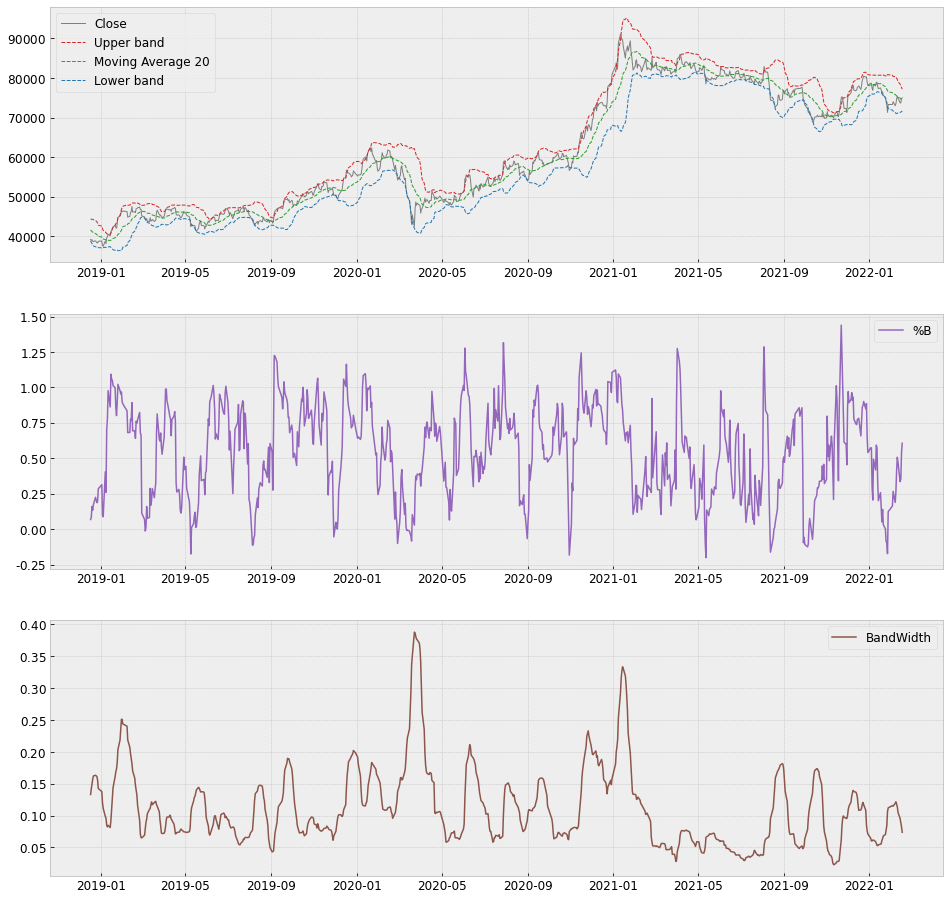

In [ ]:
tab_cols = mcolors.TABLEAU_COLORS
plt.figure(figsize=(16, 16))
plt.subplot(3,1,1)
plt.plot(df.index, df['Close'], color=tab_cols['tab:gray'], linewidth=1, label='Close')
plt.plot(df.index, df['상단밴드'], color=tab_cols['tab:red'], linestyle='dashed', linewidth=1, label='Upper band')
plt.plot(df.index, df['이동평균'], color=tab_cols['tab:green'], linestyle='dashed', linewidth=1, label='Moving Average 20')
plt.plot(df.index, df['하단밴드'], color=tab_cols['tab:blue'], linestyle='dashed', linewidth=1, label='Lower band')
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(df.index, df['PB'], color=tab_cols['tab:purple'], label='%B')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3,1,3)
plt.plot(df.index, df['밴드폭'], color=tab_cols['tab:brown'], label='BandWidth')
plt.grid(True)
plt.legend(loc='best');

# MFI(Money Flow Index, 현금흐름지표)

```
* 볼린저 밴드를 이용하여 추세 추종 매매를 할 때 사용할 수 있는 지표
* 주가와 거래량을 동시에 고려할 수 있어 주가만 고려하거나 거래량만 고려하는 지표들보다 많은 정보를 담고 있음
* 현금흐름(Money Flow) = 중심가격 x 거래량
* 중심가격(Typical Price) =  (저가+고가+종가)/3 
* MFI는 거래량 데이터에 RSI(Relative Strength Index, 상대강도지수)의 개념을 적용한 것으로 볼 수 있음. RSI가 n일 동안의 상승일의 상승폭과 하락일의 하락폭 합계를 이용하는 것처럼 MFI는 상승일 동안의 현금흐름의 합(긍정적 현금흐름)과 하락일 동안의 현금흐름의 합(부정적 현금흐름)을 이용
```


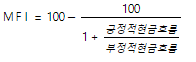

```
* 긍정적 현금흐름: 중심가격이 전일보다 상승한 날들의 현금흐름의 합
* 부정적 현금흐름: 중심가격이 전일보다 하락한 날들의 현금흐름의 합
```

In [ ]:
import pandas as pd
from datetime import datetime # 오늘날짜 가져올때 사용
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors # 색상표

# 한글폰트 설정, 그래프 마이너스 표시 설정
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
# df = fdr.DataReader('005930','2018-12-17','2022-02-17')

In [ ]:
df

,Open,High,Low,Close,Volume,Change,이동평균,표준편차,상단밴드,하단밴드,PB,밴드폭,TP,PMF,NMF,MFR,MFI10
Date,,,,,,,,,,,,,,,,,
2018-12-17,38650,39600,38650,39150,11532968,0.005135,41542.5,1382.719955,44307.939910,38777.060090,0.067429,0.133138,39133.333333,0,0,NaN,NaN
2018-12-18,38300,39200,38300,38900,11042101,-0.006386,41347.5,1468.392874,44284.285747,38410.714253,0.083303,0.142054,38800.000000,0,428433518800,NaN,NaN
2018-12-19,38900,39350,38850,39100,9942037,0.005141,41197.5,1539.008139,44275.516278,38119.483722,0.159277,0.149427,39100.000000,388733646700,0,NaN,NaN
2018-12-20,38600,39100,38500,38650,11937617,-0.011509,41007.5,1609.206653,44225.913306,37789.086694,0.133748,0.156967,38750.000000,0,462582658750,NaN,NaN
2018-12-21,38200,38650,38100,38650,14947080,0.000000,40820.0,1656.200471,44132.400942,37507.599058,0.172443,0.162293,38466.666667,0,574964344000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,75000,75500,74600,74900,12205407,-0.006631,75140.0,1972.815247,79085.630495,71194.369505,0.469587,0.105021,75000.000000,0,915405525000,1.489110,59.824998
2022-02-14,74400,74500,73100,73700,13993255,-0.016021,74880.0,1784.907487,78449.814974,71310.185026,0.334725,0.095348,73766.666667,0,1032235777166,1.464111,59.417411
2022-02-15,74100,74200,73100,73700,9320365,0.000000,74670.0,1653.099163,77976.198326,71363.801674,0.353306,0.088555,73666.666667,0,686600221666,1.831407,64.681872


In [ ]:
# 10일(거래일 기준으로 2주 동안) 기준의 현금흐름지표를 구하는 코드
df['TP'] = (df['High']+df['Low']+df['Close'])/3
df['PMF'] = 0
df['NMF'] = 0
for i in range(len(df['Close'])-1):
    # 당일의 중심가격이 전일의 중심가격보다 크면 긍정적 현금흐름
    if df['TP'].values[i] < df['TP'].values[i+1]:
        df['PMF'].values[i+1] = df['TP'].values[i+1]*df['Volume'].values[i+1]
        df['NMF'].values[i+1] = 0
    # 당일의 중심가격이 전일의 중심가격보다 작거나 같으면 부정적 현금흐름
    else:
        df['NMF'].values[i+1] = df['TP'].values[i+1]*df['Volume'].values[i+1]
        df['PMF'].values[i+1] = 0
        
df['MFR'] = df['PMF'].rolling(window=10).sum()/df['NMF'].rolling(window=10).sum()
df['MFI10'] = 100 - 100/(1+df['MFR'])

In [ ]:
df

,Open,High,Low,Close,Volume,Change,이동평균,표준편차,상단밴드,하단밴드,PB,밴드폭,TP,PMF,NMF,MFR,MFI10
Date,,,,,,,,,,,,,,,,,
2018-12-17,38650,39600,38650,39150,11532968,0.005135,41542.5,1382.719955,44307.939910,38777.060090,0.067429,0.133138,39133.333333,0,0,NaN,NaN
2018-12-18,38300,39200,38300,38900,11042101,-0.006386,41347.5,1468.392874,44284.285747,38410.714253,0.083303,0.142054,38800.000000,0,428433518800,NaN,NaN
2018-12-19,38900,39350,38850,39100,9942037,0.005141,41197.5,1539.008139,44275.516278,38119.483722,0.159277,0.149427,39100.000000,388733646700,0,NaN,NaN
2018-12-20,38600,39100,38500,38650,11937617,-0.011509,41007.5,1609.206653,44225.913306,37789.086694,0.133748,0.156967,38750.000000,0,462582658750,NaN,NaN
2018-12-21,38200,38650,38100,38650,14947080,0.000000,40820.0,1656.200471,44132.400942,37507.599058,0.172443,0.162293,38466.666667,0,574964344000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,75000,75500,74600,74900,12205407,-0.006631,75140.0,1972.815247,79085.630495,71194.369505,0.469587,0.105021,75000.000000,0,915405525000,1.489110,59.824998
2022-02-14,74400,74500,73100,73700,13993255,-0.016021,74880.0,1784.907487,78449.814974,71310.185026,0.334725,0.095348,73766.666667,0,1032235777166,1.464111,59.417411
2022-02-15,74100,74200,73100,73700,9320365,0.000000,74670.0,1653.099163,77976.198326,71363.801674,0.353306,0.088555,73666.666667,0,686600221666,1.831407,64.681872


In [ ]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
이동평균      0
표준편차      0
상단밴드      0
하단밴드      0
PB        0
밴드폭       0
TP        0
PMF       0
NMF       0
MFR       9
MFI10     9
dtype: int64

In [ ]:
df = df.dropna()
df

,Open,High,Low,Close,Volume,Change,이동평균,표준편차,상단밴드,하단밴드,PB,밴드폭,TP,PMF,NMF,MFR,MFI10
Date,,,,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,39772.5,1370.312584,42513.125169,37031.874831,0.313455,0.137815,38900.000000,305274129600,0,0.616076,38.121730
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,39490.0,1185.615541,41861.231082,37118.768918,0.101473,0.120093,37866.666667,0,472253868266,0.513287,33.918673
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,39255.0,1092.787358,41440.574717,37069.425283,0.087065,0.111353,37300.000000,0,526264133400,0.496139,33.161277
2019-01-07,38000,38900,37800,38750,12748997,0.034713,39120.0,966.872331,41053.744663,37186.255337,0.404331,0.098862,38483.333333,490623901216,0,0.530933,34.680375
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,39000.0,934.992260,40869.984520,37130.015480,0.259356,0.095897,38416.666667,0,490064282833,0.525997,34.469076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,75000,75500,74600,74900,12205407,-0.006631,75140.0,1972.815247,79085.630495,71194.369505,0.469587,0.105021,75000.000000,0,915405525000,1.489110,59.824998
2022-02-14,74400,74500,73100,73700,13993255,-0.016021,74880.0,1784.907487,78449.814974,71310.185026,0.334725,0.095348,73766.666667,0,1032235777166,1.464111,59.417411
2022-02-15,74100,74200,73100,73700,9320365,0.000000,74670.0,1653.099163,77976.198326,71363.801674,0.353306,0.088555,73666.666667,0,686600221666,1.831407,64.681872


In [ ]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
이동평균      0
표준편차      0
상단밴드      0
하단밴드      0
PB        0
밴드폭       0
TP        0
PMF       0
NMF       0
MFR       0
MFI10     0
dtype: int64

In [ ]:
# # 볼린저밴드를 그리기
# df = df.assign(이동평균=df['Close'].rolling(window=20).mean(),
#                표준편차=df['Close'].rolling(window=20).std())
# df = df.assign(상단밴드=df['이동평균'] + df['표준편차']*2,
#                하단밴드=df['이동평균'] - df['표준편차']*2)
# df = df.assign(PB=(df['Close']-df['하단밴드']) / (df['상단밴드']-df['하단밴드']),
#                밴드폭=(df['상단밴드']-df['하단밴드'])/df['이동평균'])
# df = df[19:]

In [ ]:
df

,Open,High,Low,Close,Volume,Change,이동평균,표준편차,상단밴드,하단밴드,PB,밴드폭,TP,PMF,NMF,MFR,MFI10
Date,,,,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,39772.5,1370.312584,42513.125169,37031.874831,0.313455,0.137815,38900.000000,305274129600,0,0.616076,38.121730
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,39490.0,1185.615541,41861.231082,37118.768918,0.101473,0.120093,37866.666667,0,472253868266,0.513287,33.918673
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,39255.0,1092.787358,41440.574717,37069.425283,0.087065,0.111353,37300.000000,0,526264133400,0.496139,33.161277
2019-01-07,38000,38900,37800,38750,12748997,0.034713,39120.0,966.872331,41053.744663,37186.255337,0.404331,0.098862,38483.333333,490623901216,0,0.530933,34.680375
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,39000.0,934.992260,40869.984520,37130.015480,0.259356,0.095897,38416.666667,0,490064282833,0.525997,34.469076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,75000,75500,74600,74900,12205407,-0.006631,75140.0,1972.815247,79085.630495,71194.369505,0.469587,0.105021,75000.000000,0,915405525000,1.489110,59.824998
2022-02-14,74400,74500,73100,73700,13993255,-0.016021,74880.0,1784.907487,78449.814974,71310.185026,0.334725,0.095348,73766.666667,0,1032235777166,1.464111,59.417411
2022-02-15,74100,74200,73100,73700,9320365,0.000000,74670.0,1653.099163,77976.198326,71363.801674,0.353306,0.088555,73666.666667,0,686600221666,1.831407,64.681872


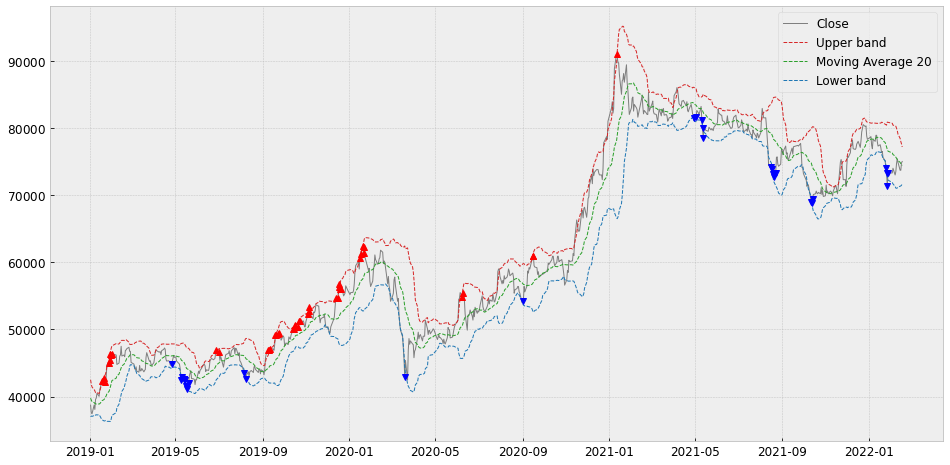

In [ ]:
tab_cols = mcolors.TABLEAU_COLORS
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Close'], color=tab_cols['tab:gray'], linewidth=1, label='Close')
plt.plot(df.index, df['상단밴드'], color=tab_cols['tab:red'], linestyle='dashed', linewidth=1, label='Upper band')
plt.plot(df.index, df['이동평균'], color=tab_cols['tab:green'], linestyle='dashed', linewidth=1, label='Moving Average 20')
plt.plot(df.index, df['하단밴드'], color=tab_cols['tab:blue'], linestyle='dashed', linewidth=1, label='Lower band')


for i in range(df.shape[0]):
    if df['PB'].values[i] > 0.8 and df['MFI10'].values[i] > 80:
        plt.plot(df.index.values[i], df['Close'].values[i], 'r^')
    elif df['PB'].values[i] < 0.2 and df['MFI10'].values[i] < 20:
        plt.plot(df.index.values[i], df['Close'].values[i], 'bv')
plt.legend(loc='best');

```
* %b 값이 0.8보다 크고, MFI 값이 80보다 크면 매수, %b값이 0.2보다 작고, MFI 값이 20보다 작으면 매도하는 전략

* 빨간색 화살표가 매수지점을 표시한 것이고, 파란색 화살표가 매도지점을 표시한 것
```

## Backtesting

In [ ]:
signal = []
for i in range(len(df)):
    if df['PB'].values[i] > 0.8 and df['MFI10'].values[i] > 80:
        signal.append(1)
    elif df['PB'].values[i] < 0.2 and df['MFI10'].values[i] < 20:
        signal.append(-1)
    else:
      signal.append(0)

In [ ]:
signal

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [ ]:
df['signal'] = signal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,Open,High,Low,Close,Volume,Change,이동평균,표준편차,상단밴드,하단밴드,PB,밴드폭,TP,PMF,NMF,MFR,MFI10,signal
Date,,,,,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,39772.5,1370.312584,42513.125169,37031.874831,0.313455,0.137815,38900.000000,305274129600,0,0.616076,38.121730,0
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,39490.0,1185.615541,41861.231082,37118.768918,0.101473,0.120093,37866.666667,0,472253868266,0.513287,33.918673,0
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,39255.0,1092.787358,41440.574717,37069.425283,0.087065,0.111353,37300.000000,0,526264133400,0.496139,33.161277,0
2019-01-07,38000,38900,37800,38750,12748997,0.034713,39120.0,966.872331,41053.744663,37186.255337,0.404331,0.098862,38483.333333,490623901216,0,0.530933,34.680375,0
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,39000.0,934.992260,40869.984520,37130.015480,0.259356,0.095897,38416.666667,0,490064282833,0.525997,34.469076,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,75000,75500,74600,74900,12205407,-0.006631,75140.0,1972.815247,79085.630495,71194.369505,0.469587,0.105021,75000.000000,0,915405525000,1.489110,59.824998,0
2022-02-14,74400,74500,73100,73700,13993255,-0.016021,74880.0,1784.907487,78449.814974,71310.185026,0.334725,0.095348,73766.666667,0,1032235777166,1.464111,59.417411,0
2022-02-15,74100,74200,73100,73700,9320365,0.000000,74670.0,1653.099163,77976.198326,71363.801674,0.353306,0.088555,73666.666667,0,686600221666,1.831407,64.681872,0


In [ ]:
!pip install finterstellar

In [ ]:
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(df,factor='signal', buy=0, sell=0)

/usr/local/lib/python3.7/dist-packages/finterstellar/trading.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trade'] = np.nan
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2022-02-11    zero
2022-02-14    zero
2022-02-15    zero
2022-02-16    zero
2022-02-17    zero
Name: trade, Length: 773, dtype: object

In [ ]:
fs.position(df)

/usr/local/lib/python3.7/dist-packages/finterstellar/trading.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'] = ''
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/finterstellar/trading.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2022-02-11    zz
2022-02-14    zz
2022-02-15    zz
2022-02-16    zz
2022-02-17    zz
Name: position, Length: 773, dtype: object

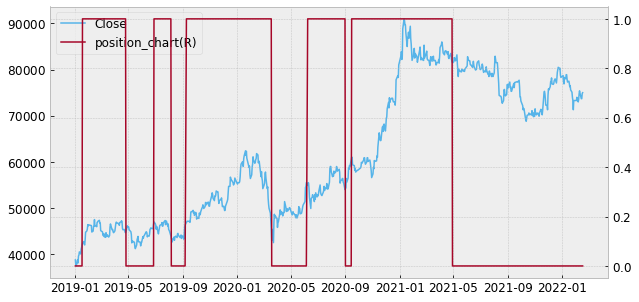

In [ ]:
fs.draw_chart(df, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(df, cost=0.0001)

/usr/local/lib/python3.7/dist-packages/finterstellar/trading.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal_price'] = np.nan
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

,Open,High,Low,Close,Volume,Change,이동평균,표준편차,상단밴드,하단밴드,PB,밴드폭,TP,PMF,NMF,MFR,MFI10,signal,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,39772.5,1370.312584,42513.125169,37031.874831,0.313455,0.137815,38900.000000,305274129600,0,0.616076,38.121730,0,zero,,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,39490.0,1185.615541,41861.231082,37118.768918,0.101473,0.120093,37866.666667,0,472253868266,0.513287,33.918673,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9721
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,39255.0,1092.787358,41440.574717,37069.425283,0.087065,0.111353,37300.000000,0,526264133400,0.496139,33.161277,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9505
2019-01-07,38000,38900,37800,38750,12748997,0.034713,39120.0,966.872331,41053.744663,37186.255337,0.404331,0.098862,38483.333333,490623901216,0,0.530933,34.680375,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9645
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,39000.0,934.992260,40869.984520,37130.015480,0.259356,0.095897,38416.666667,0,490064282833,0.525997,34.469076,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,75000,75500,74600,74900,12205407,-0.006631,75140.0,1972.815247,79085.630495,71194.369505,0.469587,0.105021,75000.000000,0,915405525000,1.489110,59.824998,0,zero,zz,0,1.0,1.0,1.225643,22.56,0.9069,0.8306
2022-02-14,74400,74500,73100,73700,13993255,-0.016021,74880.0,1784.907487,78449.814974,71310.185026,0.334725,0.095348,73766.666667,0,1032235777166,1.464111,59.417411,0,zero,zz,0,1.0,1.0,1.225643,22.56,0.9069,0.8239
2022-02-15,74100,74200,73100,73700,9320365,0.000000,74670.0,1653.099163,77976.198326,71363.801674,0.353306,0.088555,73666.666667,0,686600221666,1.831407,64.681872,0,zero,zz,0,1.0,1.0,1.225643,22.56,0.9069,0.8206


In [ ]:
# 무위험 수익률
fs.performance(df, rf_rate=0.02)

CAGR: 6.72%
Accumulated return: 22.56%
Average return: 5.18%
Benchmark return : 90.36%
Number of trades: 5
Number of win: 2
Hit ratio: 40.00%
Investment period: 3.1yrs
Sharpe ratio: 0.17
MDD: -33.53%
Benchmark MDD: -31.29%


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/finterstellar/trading.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exs_rtn_daily'] = df['daily_rtn'] - rf_rate_daily


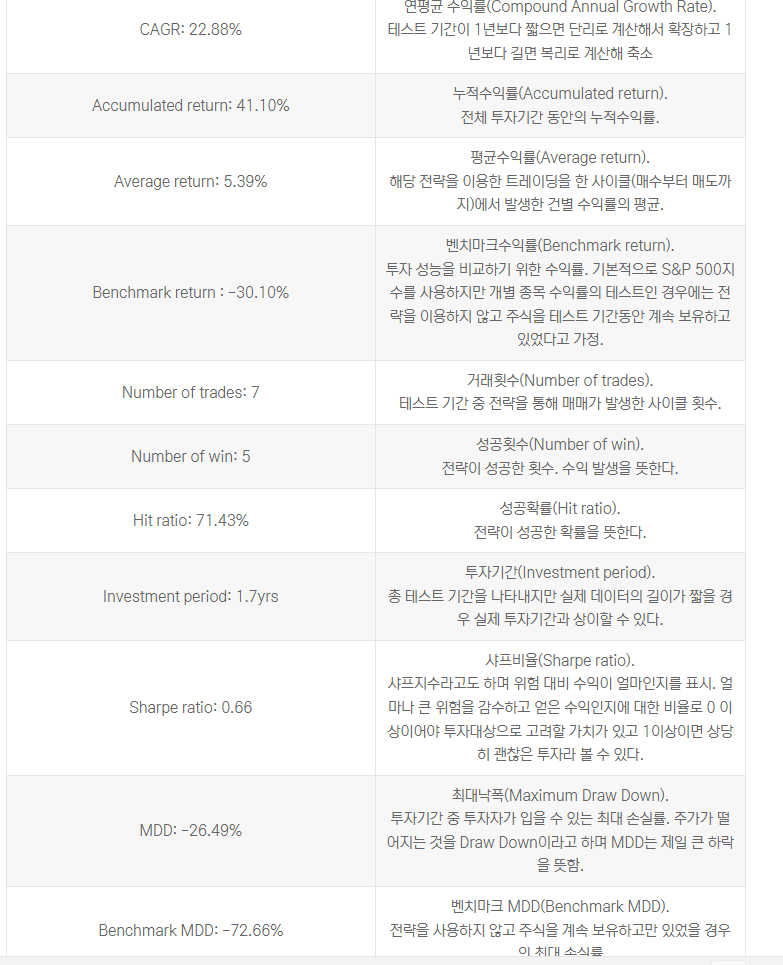

# pykrx
https://github.com/sharebook-kr/pykrx

KRX, Naver 등의 웹사이트에서 주가정보를 스크래핑하는 모듈